In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

df_orders = pd.read_excel('orders.xlsx')
df_products = pd.read_excel('products.xlsx')

In [11]:
df_orders

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130
...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45


In [ ]:
# level1 -- product category
# level2 -- product sub category
df_products

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio
...,...,...,...,...
40147,112937,Безалкогольные напитки,Напитки,Напиток Venom
40148,112997,Бакалея,Пряности,Приправа Adjika Family
40149,113057,Бакалея,Пряности,Соль Кулина
40150,113117,Кулинария,Готовые блюда,Салат Хлеб Насущный


In [ ]:
# which category sold the most items?

In [56]:
# finding how much each product id was sold
df_products_sold_amnt = df_orders.groupby(['product_id'], as_index=False).agg({'quantity': 'sum'})

df_report = df_products_sold_amnt.merge(df_products, on='product_id')

In [87]:
df_report_1 = df_report.groupby(['level1'], as_index=False).agg({'quantity': 'sum'})
df_report_1 = df_report_1.sort_values('quantity', ascending=False)

In [97]:
df_report_1

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239
25,Хлеб и хлебобулочные изделия,218
21,Снэки,212
20,Свежие фрукты,184
6,Замороженная продукция,175
7,Кондитерские изделия,138


Text(0.5, 25.722222222222214, 'Category')

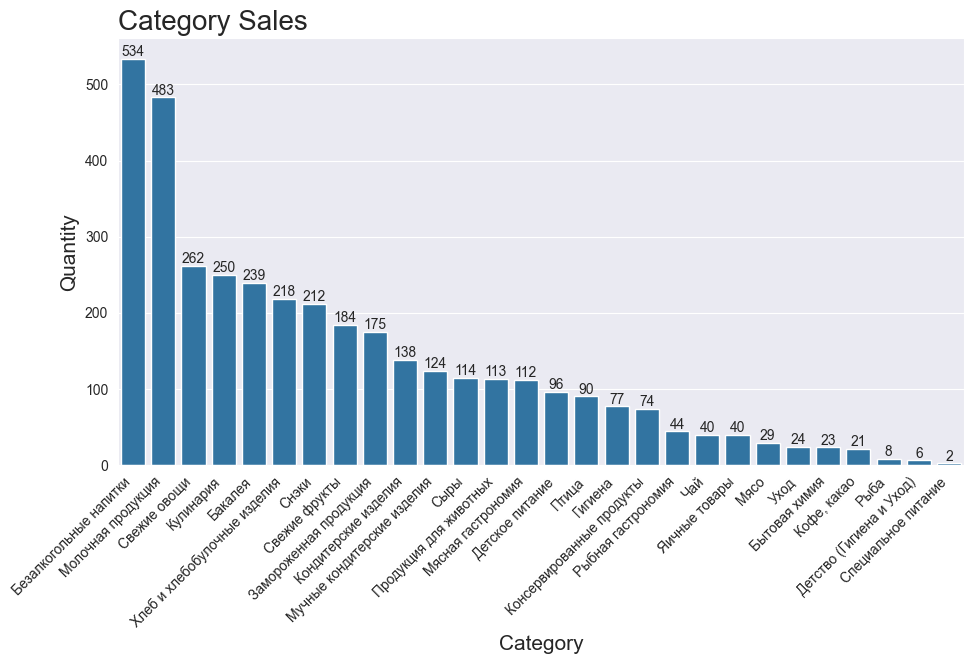

In [ ]:
plt.figure(figsize=(10, 5))


ax = sns.barplot(df_report_1, x='level1', y='quantity')
plt.tight_layout()
plt.bar(labels, counts.values)
plt.bar_label(ax.containers[0])
plt.xticks(rotation=45, ha='right')
plt.title('Category Sales', size=20, loc='left')
plt.ylabel('Quantity', size=15)
plt.xlabel('Category', size=15)